# Model comparisons

Plan to test
- Random forest
- CNN
- Kernel SVM ?
- Gradient Boosting ?

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("G:/My Drive/Erdos/Fall2022_Juniper/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

No missing data

In [4]:
data1 = data.copy(deep=True)
X = data1.drop(['Cover_Type'],axis=1)
y = data1['Cover_Type']

implement cross-validataion later-
kfold = KFold(n_splits = 5, shuffle = True, random_state = 314)

In [5]:
X_train,X_test, y_train, y_test = train_test_split(X,y,
                               shuffle = True,
                               random_state=314,
                               test_size=0.3)

In [10]:
unique, count= np.unique(y_train, return_counts=True)
print("The number of occurances of each class = %s " % dict (zip(unique, count) ), "\n" )

The number of occurances of each class = {1: 1521, 2: 1496, 3: 1522, 4: 1483, 5: 1525, 6: 1477, 7: 1560}  



C:\Users\m0eka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

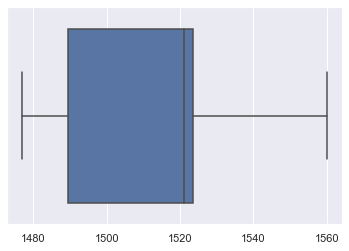

In [27]:
sns.boxplot(count)

No outliers. The number of occurances in each class are roughly similar.

## Random Forest

No need for standard scaling. Find the best accuracy scores with n_estimators of 100, 200, 300, and 400.

In [21]:
rf_accuracy = {}
for i in range(1,5):
    rf = RandomForestClassifier(n_estimators = 100*i)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    rf_accuracy[100*i] = round(accuracy_score(y_test, y_pred),4)
print(rf_accuracy)

{100: 0.8629, 200: 0.8668, 300: 0.8697, 400: 0.8682}


n_estimators of 300 has the highest accuracy among 4. So, let's use this for the later analysis.

In [22]:
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

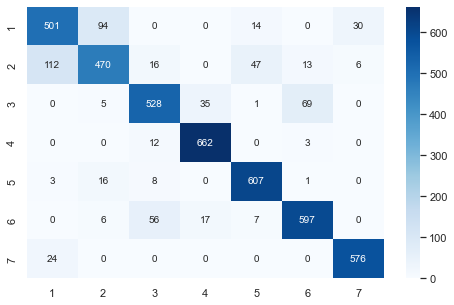

In [23]:
rf_confusion = confusion_matrix(y_test,y_pred)
rf_cm = pd.DataFrame(rf_confusion, 
                     index = [i for i in "1234567"],
                     columns = [i for i in "1234567"])
plt.figure(figsize=(8,5))
sn.set(font_scale=1)
sn.heatmap(rf_cm,annot=True,fmt='g', cmap='Blues',
           annot_kws={"size": 10})
plt.show()

In [24]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Random Forest Model')
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, 
                            target_names=['1','2','3','4','5','6','7']))

Random Forest Model

Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

              precision    recall  f1-score   support

           1       0.78      0.78      0.78       639
           2       0.80      0.71      0.75       664
           3       0.85      0.83      0.84       638
           4       0.93      0.98      0.95       677
           5       0.90      0.96      0.93       635
           6       0.87      0.87      0.87       683
           7       0.94      0.96      0.95       600

    accuracy                           0.87      4536
   macro avg       0.87      0.87      0.87      4536
weighted avg       0.87      0.87      0.87      4536

